# Contents<a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data initialization](#initialization)
* [Stage 2. Data overview & preprocessing](#overview)
    * [2.1 Contract](#contract)
    * [2.2 Internet](#internet)
    * [2.3 Personal](#personal)
    * [2.4 Phone](#phone)
    * [2.5 Merge Datasets](#merge)
    * [2.6 Treat Missing Values](#missing)
* [Stage 3. EDA](#eda)
    * [3.1 Compare: Monthly Charges](#monthly_charge)
    * [3.2 Telephone users](#tel_users)
    * [3.3 Internet users](#int_users)
    * [3.4 Convert to dummies](#dummies)
    * [3.5 Scaling due to the imbalance data](#scaling)
* [Stage 4. Modeling](#model)
     * [4.1 Logistic Regression](#lr)
     * [4.2 DecisionTree Classifier](#dtc)
     * [4.3 RandomForest Classifier](#rfc)
     * [4.4 RandomForest Classifier with Hyperparameter](#rfc_hyper)
* [Stage 5. Model Evaluation](#evaluate)
* [Conclusion](#end)

# Introduction<a id='intro'></a>

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

While a model for predicting the churn of clientele is in the process of being created, Interconnect's marketing department has started figuring out different ways of retaining clients. You'll need to collect the necessary information to assist them.
Compare the monthly payment distribution (MonthlyCharges) of all active clients with the clients who have left. Calculate the following statistics for each group: the average, minimum and maximum values, the median, and the values of the 25% and 75% percentiles. Build distribution histograms based on your findings.

Compare the behavior of the clients from the two groups below. For each group, build any two graphs which display:
 * The share of telephone users
 * The share of Internet users


Clarification: Summary
* Target feature: the 'EndDate' column equals 'No'. 
* Primary metric: AUC-ROC.
* Additional metric: Accuracy. 

In each file, the column customerID contains a unique code assigned to each client. The contract information is valid as of `February 1, 2020`.

## Stage 1. Data initialization<a id='initialization'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_contract = pd.read_csv("contract.csv")
df_internet = pd.read_csv("internet_1.csv")
df_personal = pd.read_csv("personal.csv")
df_phone = pd.read_csv("phone.csv")

## Stage 2. Data overview & preprocessing<a id='overview'></a>

### Contract<a id='contract'></a>

In [3]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


There's no missing values in the data.

**To improve:**
1. Change `TotalCharges` type to float.
2. Change `BeginDate` & `EndDate` dtype to datetime.
2. Create an 'exited' colum.

In [5]:
df_contract['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
# Convert TotalCharges to float
# There seems to be string '' in the dataset, replace as nan values

df_contract['TotalCharges'].replace(' ', np.nan, inplace=True)
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype('float')

In [7]:
# Detect missing values in TotalCharges

df_contract[df_contract['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


In [8]:
# Replace missing values with 0 since the customer only register recently

df_contract['TotalCharges'].fillna(0, inplace=True)

In [9]:
# Check

df_contract['TotalCharges'].isna().sum()

0

In [10]:
# Create exited column

df_contract['exited'] = df_contract['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

In [11]:
# Change 'No' to date & split the time value from the date

def process_end_date(end_date):
    if end_date == 'No':
        return '2020-02-01'
    elif ' 00:00:00' in end_date:
        return end_date.split(' ')[0]
    return end_date

In [12]:
# Apply function

df_contract['EndDate'] = df_contract['EndDate'].apply(process_end_date)

In [13]:
# Convert date column to datetime format

df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'])

In [14]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   exited            7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB


In [15]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,exited
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [16]:
# Add 'duration' column

df_contract['duration'] = (df_contract['EndDate']- df_contract['BeginDate']).dt.days

In [17]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   exited            7043 non-null   int64         
 9   duration          7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 550.4+ KB


In [18]:
# Drop unnecessary columns

df_contract1 = df_contract.drop(['BeginDate','EndDate'], axis =1)
df_contract1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   float64
 6   exited            7043 non-null   int64  
 7   duration          7043 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 440.3+ KB


### Internet<a id='internet'></a>

In [19]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [20]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


> There's no missing values in the data. This dataset consist mostly of binary data.


### Personal<a id='personal'></a>

In [21]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [22]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


> There's no missing values in the data. This dataset consist mostly of binary data.

### Phone<a id='phone'></a>

In [23]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [24]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


> There's no missing values in the data. This dataset consist of binary data as well.

### Merge Datasets<a id='merge'></a>

In [25]:
df_1 = pd.merge(df_personal, df_contract1, on = 'customerID', how ='outer')
df_2 = pd.merge(df_internet, df_phone, on = 'customerID', how = 'outer')
df_final = pd.merge(df_1, df_2, on= 'customerID', how= 'outer')
df_final

,customerID,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,exited,duration,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,One year,No,Mailed check,56.95,1889.50,0,1036,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,730,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,2191,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,Month-to-month,Yes,Electronic check,29.60,346.45,0,337,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,Male,1,Yes,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,123,Fiber optic,No,No,No,No,No,No,Yes


In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Type              7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   PaymentMethod     7043 non-null   object 
 8   MonthlyCharges    7043 non-null   float64
 9   TotalCharges      7043 non-null   float64
 10  exited            7043 non-null   int64  
 11  duration          7043 non-null   int64  
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


### Treat Missing Values<a id='missing'></a>

In [27]:
df_final['InternetService'].value_counts(dropna = False)

Fiber optic    3096
DSL            2421
NaN            1526
Name: InternetService, dtype: int64

In [28]:
columns = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
df_final[columns].apply(lambda col: col.value_counts(dropna=False))

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
No,3498,3088,3095,3473,2810,2785,3390
Yes,2019,2429,2422,2044,2707,2732,2971
NaN,1526,1526,1526,1526,1526,1526,682


In [29]:
col = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
df_final[col] = df_final[col].fillna('No')

In [30]:
# Check

df_final['InternetService'].value_counts(dropna = False)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [31]:
# Check

df_final[columns].apply(lambda col: col.value_counts(dropna=False))

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
No,5024,4614,4621,4999,4336,4311,4072
Yes,2019,2429,2422,2044,2707,2732,2971


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Type              7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   PaymentMethod     7043 non-null   object 
 8   MonthlyCharges    7043 non-null   float64
 9   TotalCharges      7043 non-null   float64
 10  exited            7043 non-null   int64  
 11  duration          7043 non-null   int64  
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


## Stage 3. EDA<a id='eda'></a>

In [33]:
df_final.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges,exited,duration
SeniorCitizen,1.000000,0.220173,0.103006,0.150889,0.016514
MonthlyCharges,0.220173,1.000000,0.651174,0.193356,0.247754
TotalCharges,0.103006,0.651174,1.000000,-0.198324,0.826109
exited,0.150889,0.193356,-0.198324,1.000000,-0.352673
duration,0.016514,0.247754,0.826109,-0.352673,1.000000


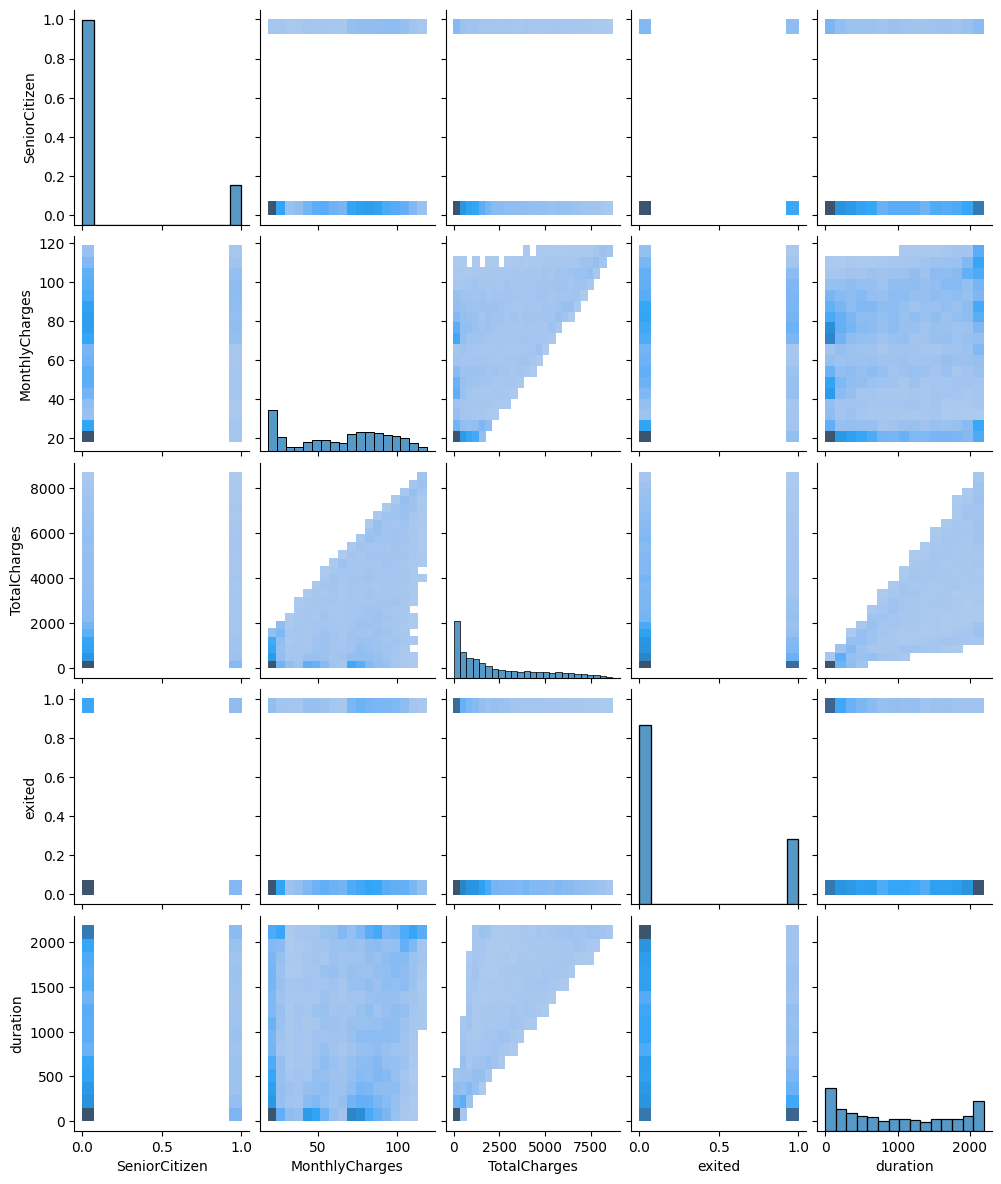

In [34]:
a = sns.pairplot(df_final, kind='hist')
a.fig.set_size_inches(10, 12)

### Compare: Monthly Chargers<a id='monthly_charge'></a>

array([<AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

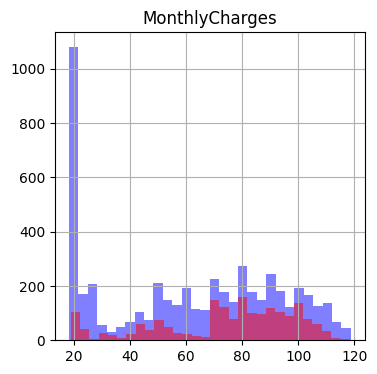

In [35]:
# Compare the monthly payment distribution (MonthlyCharges) of all active clients with the churn clients

remain = df_final[df_final.exited == 0]
exited = df_final[df_final.exited == 1]
monthly_charges = ['MonthlyCharges']

fig, ax = plt.subplots(1,1, figsize =(4,4))
remain[monthly_charges].hist(bins = 30, color='blue', alpha=0.5, ax=ax)
exited[monthly_charges].hist(bins = 30, color='red', alpha=0.5, ax=ax)

In [36]:
# Calculate the average, minimum and maximum values, the median, and the values of the 25% and 75% percentiles

exited_data = df_final.groupby('exited')['MonthlyCharges']
exited_data.describe()

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


> The graph compares between the active clients with the churn clients in terms of Monthly Charges. It shows that there are more clients who have churn have a higher monthly charges.

### Telephone users<a id='tel_users'></a>

(0.0, 3200.0)

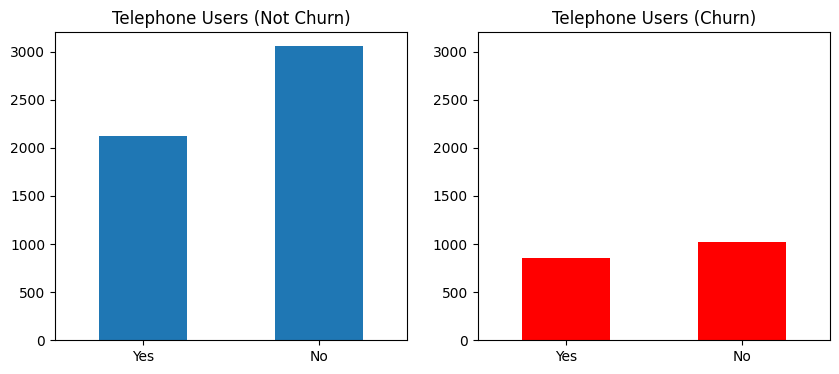

In [37]:
# Build graph to display the share of telephone users

multiple_lines = 'MultipleLines'

fig, ax = plt.subplots(1,2, figsize =(10,4))
remain[multiple_lines].value_counts().sort_values(ascending=True).plot(kind = 'bar', ax= ax[0]).set_title('Telephone Users (Not Churn)')
exited[multiple_lines].value_counts().sort_values(ascending=True).plot(kind = 'bar', ax= ax[1], color= 'red').set_title('Telephone Users (Churn)')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=360)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=360)

ax[0].set_ylim(0, 3200)
ax[1].set_ylim(0, 3200)

> The telephone users who have churn is lesser compare to the clients who are still active.

### Internet users<a id='int_users'></a>

(0.0, 2000.0)

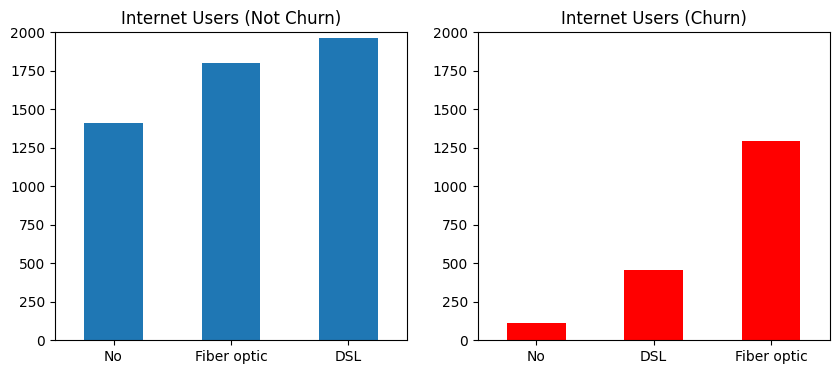

In [38]:
# Build graph to display the share of Internet users

internet_user = 'InternetService'

fig, ax = plt.subplots(1,2, figsize =(10,4))
remain[internet_user].value_counts().sort_values(ascending=True).plot(kind = 'bar', ax= ax[0]).set_title('Internet Users (Not Churn)')
exited[internet_user].value_counts().sort_values(ascending=True).plot(kind = 'bar', ax= ax[1], color= 'red').set_title('Internet Users (Churn)')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=360)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=360)

ax[0].set_ylim(0, 2000)
ax[1].set_ylim(0, 2000)

> It seems that the Internet Users, particularly those using `Fiber optic` have the most clients churn.

> There might be a correlation to the reason that clients choose to churn.

In [39]:
# Check the balance of users who left and who remains

print(f"Percentage of Client that have left: {(len(df_final[df_final['exited'] == 1])/len(df_final)*100):.2f}%")
print(f"Percentage of Client that remain: {(len(df_final[df_final['exited'] == 0])/len(df_final)*100):.2f}%")

Percentage of Client that have left: 26.54%
Percentage of Client that remain: 73.46%


> Only 26.54% of the users have exited Interconnect. The data is imbalance.

### Convert to dummies<a id='dummies'></a>

In [40]:
# Drop unecessary columns & 

df_final = df_final.drop(columns=['customerID'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Type              7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   PaymentMethod     7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7043 non-null   float64
 9   exited            7043 non-null   int64  
 10  duration          7043 non-null   int64  
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null   object 


In [41]:
# Convert dataset into dummies

df_final = pd.get_dummies(df_final, drop_first=True)
df_final.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,exited,duration,gender_Male,Partner_Yes,Dependents_Yes,Type_One year,Type_Two year,...,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,0,29.85,29.85,0,31,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1036,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
2,0,53.85,108.15,1,61,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1371,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
4,0,70.70,151.65,1,61,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Scaling due to the imbalance data<a id='scaling'></a>

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

scaler.fit(df_final.drop(['exited'], axis = 1))
scaled_features = scaler.transform(df_final.drop(['exited'], axis = 1))

In [44]:
# Train test split

X = scaled_features
y = df_final[['exited']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54321)

## Stage 4. Modeling<a id='model'></a>

### Logistic Regression<a id='lr'></a>

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer

In [46]:
lg_model = LogisticRegression(random_state=54321, solver="liblinear")

lg_model.fit(X_train, y_train)

# Predictions
y_train_pred = lg_model.predict(X_train)
y_test_pred = lg_model.predict(X_test)
y_train_prob = lg_model.predict_proba(X_train)[:, 1]
y_test_prob = lg_model.predict_proba(X_test)[:, 1]

# Calculate metrics
lg_roc_auc_train = roc_auc_score(y_train, y_train_prob)
lg_roc_auc_test = roc_auc_score(y_test, y_test_prob)
lg_accuracy_train = accuracy_score(y_train, y_train_pred)
lg_accuracy_test = accuracy_score(y_test, y_test_pred)
lg_f1_train = f1_score(y_train, y_train_pred)
lg_f1_test = f1_score(y_test, y_test_pred)

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [47]:
print("Logistic Regression Training Metrics:")
print(f"AUC-ROC:  {lg_roc_auc_train:.4f}")
print(f"Accuracy: {lg_accuracy_train:.4f}")
print(f"F1 Score: {lg_f1_train:.4f}")
print()
print("Logistic Regression Validation Metrics:")
print(f"AUC-ROC:  {lg_roc_auc_test:.4f}")
print(f"Accuracy: {lg_accuracy_test:.4f}")
print(f"F1 Score: {lg_f1_test:.4f}")

Logistic Regression Training Metrics:
AUC-ROC:  0.8471
Accuracy: 0.8053
F1 Score: 0.5945

Logistic Regression Validation Metrics:
AUC-ROC:  0.8542
Accuracy: 0.8133
F1 Score: 0.6237


### DecisionTree Classifier<a id='dtc'></a>

In [48]:
from sklearn.tree import DecisionTreeClassifier 

In [49]:
depths = [None, 1, 2, 3, 4, 5]
samples_split = [2, 3, 4, 5, 6]
samples_leaf = [1, 2, 3, 4, 5]

# Dictionary to store the best metrics and corresponding hyperparameters
best_metrics = {
    "depth": 0, "split": 0, "leaf": 0,
    "accuracy": 0, "f1_score": 0, "auc_roc": 0
}

# Grid search
for i in depths:
    for j in samples_split:
        for k in samples_leaf:
            # Create a classifier object
            dt_classifier = DecisionTreeClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dt_classifier.fit(X_train, y_train)
            
            # Predictions and predicted probabilities
            y_test_pred = dt_classifier.predict(X_test)
            y_test_prob = dt_classifier.predict_proba(X_test)[:, 1]
            
            # Calculate metrics
            accuracy_test = accuracy_score(y_test, y_test_pred)
            f1_test = f1_score(y_test, y_test_pred)
            auc_roc_test = roc_auc_score(y_test, y_test_prob)
            
            # Print metrics
            print(f"Max Depth-{i}, Samples Split-{j}, Samples Leaf-{k}: Accuracy={accuracy_test:.4f}, F1 Score={f1_test:.4f}, AUC-ROC={auc_roc_test:.4f}")
            
            # Update best metrics if current metrics are better
            if accuracy_test > best_metrics['accuracy']:
                best_metrics.update({
                    "depth": i, "split": j, "leaf": k,
                    "accuracy": accuracy_test, "f1_score": f1_test, "auc_roc": auc_roc_test
                })

Max Depth-None, Samples Split-2, Samples Leaf-1: Accuracy=0.7757, F1 Score=0.5875, AUC-ROC=0.7147
Max Depth-None, Samples Split-2, Samples Leaf-2: Accuracy=0.7821, F1 Score=0.5754, AUC-ROC=0.7365
Max Depth-None, Samples Split-2, Samples Leaf-3: Accuracy=0.7686, F1 Score=0.5583, AUC-ROC=0.7382
Max Depth-None, Samples Split-2, Samples Leaf-4: Accuracy=0.7729, F1 Score=0.5543, AUC-ROC=0.7584
Max Depth-None, Samples Split-2, Samples Leaf-5: Accuracy=0.7786, F1 Score=0.5818, AUC-ROC=0.7764
Max Depth-None, Samples Split-3, Samples Leaf-1: Accuracy=0.7793, F1 Score=0.5903, AUC-ROC=0.7314
Max Depth-None, Samples Split-3, Samples Leaf-2: Accuracy=0.7750, F1 Score=0.5591, AUC-ROC=0.7345
Max Depth-None, Samples Split-3, Samples Leaf-3: Accuracy=0.7665, F1 Score=0.5596, AUC-ROC=0.7376
Max Depth-None, Samples Split-3, Samples Leaf-4: Accuracy=0.7736, F1 Score=0.5624, AUC-ROC=0.7570
Max Depth-None, Samples Split-3, Samples Leaf-5: Accuracy=0.7800, F1 Score=0.5788, AUC-ROC=0.7731
Max Depth-None, Samp

Max Depth-3, Samples Split-6, Samples Leaf-2: Accuracy=0.7913, F1 Score=0.4576, AUC-ROC=0.8213
Max Depth-3, Samples Split-6, Samples Leaf-3: Accuracy=0.7913, F1 Score=0.4576, AUC-ROC=0.8213
Max Depth-3, Samples Split-6, Samples Leaf-4: Accuracy=0.7913, F1 Score=0.4576, AUC-ROC=0.8213
Max Depth-3, Samples Split-6, Samples Leaf-5: Accuracy=0.7913, F1 Score=0.4576, AUC-ROC=0.8213
Max Depth-4, Samples Split-2, Samples Leaf-1: Accuracy=0.7999, F1 Score=0.5791, AUC-ROC=0.8469
Max Depth-4, Samples Split-2, Samples Leaf-2: Accuracy=0.7999, F1 Score=0.5791, AUC-ROC=0.8469
Max Depth-4, Samples Split-2, Samples Leaf-3: Accuracy=0.7999, F1 Score=0.5791, AUC-ROC=0.8469
Max Depth-4, Samples Split-2, Samples Leaf-4: Accuracy=0.7999, F1 Score=0.5791, AUC-ROC=0.8469
Max Depth-4, Samples Split-2, Samples Leaf-5: Accuracy=0.7999, F1 Score=0.5791, AUC-ROC=0.8471
Max Depth-4, Samples Split-3, Samples Leaf-1: Accuracy=0.7999, F1 Score=0.5791, AUC-ROC=0.8469
Max Depth-4, Samples Split-3, Samples Leaf-2: Accu

In [50]:
# Print the best hyperparameters and metrics

print("Best Hyperparameters and Metrics:")
print(f"Max Depth: {best_metrics['depth']}, Samples Split: {best_metrics['split']}, Samples Leaf: {best_metrics['leaf']}")
print()
print('DecisionTree Accuracy:')
print(f"AUC-ROC: {best_metrics['auc_roc']:.4f}")
print(f"Accuracy: {best_metrics['accuracy']:.4f}")
print(f"F1 Score: {best_metrics['f1_score']:.4f}")


Best Hyperparameters and Metrics:
Max Depth: 5, Samples Split: 2, Samples Leaf: 1

DecisionTree Accuracy:
AUC-ROC: 0.8520
Accuracy: 0.8013
F1 Score: 0.5639


### RandomForest Classifier<a id='rfc'></a>

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
depths = [None, 1, 2, 3, 4, 5]
samples_split = [2, 3, 4, 5, 6]
samples_leaf = [1, 2, 3, 4, 5]

# Dictionary to store the best metrics and corresponding hyperparameters
best_rf_metrics = {
    "depth": 0, "split": 0, "leaf": 0,
    "rf_accuracy": 0, "rf_f1_score": 0, "rf_auc_roc": 0
}

# Grid search
for i in depths:
    for j in samples_split:
        for k in samples_leaf:
            # Create a classifier object
            rf_classifier = RandomForestClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k, random_state=54321)
            rf_classifier.fit(X_train, y_train)
            
            # Predictions and predicted probabilities
            y_test_pred = rf_classifier.predict(X_test)
            y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]
            
            # Calculate metrics
            rf_accuracy_test = accuracy_score(y_test, y_test_pred)
            rf_f1_test = f1_score(y_test, y_test_pred)
            rf_auc_roc_test = roc_auc_score(y_test, y_test_prob)
            
            # Print metrics
            print(f"Max Depth-{i}, Samples Split-{j}, Samples Leaf-{k}: RF Accuracy={rf_accuracy_test:.4f}, RF F1 Score={rf_f1_test:.4f}, RF AUC-ROC={rf_auc_roc_test:.4f}")
            
            # Update best metrics if current metrics are better
            if rf_accuracy_test > best_rf_metrics['rf_accuracy']:
                best_rf_metrics.update({
                    "depth": i, "split": j, "leaf": k,
                    "rf_accuracy": rf_accuracy_test, "rf_f1_score": rf_f1_test, "rf_auc_roc": rf_auc_roc_test
                })

/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-1: RF Accuracy=0.8070, RF F1 Score=0.5904, RF AUC-ROC=0.8489


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-2: RF Accuracy=0.8204, RF F1 Score=0.6172, RF AUC-ROC=0.8568


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-3: RF Accuracy=0.8197, RF F1 Score=0.6140, RF AUC-ROC=0.8588


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-4: RF Accuracy=0.8190, RF F1 Score=0.6119, RF AUC-ROC=0.8590


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-5: RF Accuracy=0.8190, RF F1 Score=0.6142, RF AUC-ROC=0.8617


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-1: RF Accuracy=0.8133, RF F1 Score=0.6009, RF AUC-ROC=0.8493


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-2: RF Accuracy=0.8204, RF F1 Score=0.6172, RF AUC-ROC=0.8568


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-3: RF Accuracy=0.8197, RF F1 Score=0.6140, RF AUC-ROC=0.8588


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-4: RF Accuracy=0.8190, RF F1 Score=0.6119, RF AUC-ROC=0.8590


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-5: RF Accuracy=0.8190, RF F1 Score=0.6142, RF AUC-ROC=0.8617


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-1: RF Accuracy=0.8126, RF F1 Score=0.6036, RF AUC-ROC=0.8544


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-2: RF Accuracy=0.8204, RF F1 Score=0.6172, RF AUC-ROC=0.8568


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-3: RF Accuracy=0.8197, RF F1 Score=0.6140, RF AUC-ROC=0.8588


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-4: RF Accuracy=0.8190, RF F1 Score=0.6119, RF AUC-ROC=0.8590


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-5: RF Accuracy=0.8190, RF F1 Score=0.6142, RF AUC-ROC=0.8617


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-1: RF Accuracy=0.8133, RF F1 Score=0.6069, RF AUC-ROC=0.8529


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-2: RF Accuracy=0.8219, RF F1 Score=0.6203, RF AUC-ROC=0.8564


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-3: RF Accuracy=0.8197, RF F1 Score=0.6140, RF AUC-ROC=0.8588


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-4: RF Accuracy=0.8190, RF F1 Score=0.6119, RF AUC-ROC=0.8590


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-5: RF Accuracy=0.8190, RF F1 Score=0.6142, RF AUC-ROC=0.8617


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-6, Samples Leaf-1: RF Accuracy=0.8176, RF F1 Score=0.6112, RF AUC-ROC=0.8566


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-6, Samples Leaf-2: RF Accuracy=0.8211, RF F1 Score=0.6123, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-6, Samples Leaf-3: RF Accuracy=0.8197, RF F1 Score=0.6140, RF AUC-ROC=0.8588


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-6, Samples Leaf-4: RF Accuracy=0.8190, RF F1 Score=0.6119, RF AUC-ROC=0.8590


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-6, Samples Leaf-5: RF Accuracy=0.8190, RF F1 Score=0.6142, RF AUC-ROC=0.8617


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-1: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-2: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-3: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-4: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-5: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-1: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-2: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-3: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-4: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-5: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-1: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-2: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-3: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-4: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-5: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-1: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-2: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-3: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-4: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-5: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-6, Samples Leaf-1: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-6, Samples Leaf-2: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-6, Samples Leaf-3: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-6, Samples Leaf-4: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-6, Samples Leaf-5: RF Accuracy=0.7239, RF F1 Score=0.0000, RF AUC-ROC=0.8380


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-1: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-2: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-3: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-4: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-5: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-1: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-2: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-3: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-4: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-5: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-1: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-2: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-3: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-4: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-5: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-1: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-2: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-3: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-4: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-5: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-6, Samples Leaf-1: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-6, Samples Leaf-2: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-6, Samples Leaf-3: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-6, Samples Leaf-4: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-6, Samples Leaf-5: RF Accuracy=0.7473, RF F1 Score=0.1759, RF AUC-ROC=0.8474


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-1: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-2: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-3: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-4: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-5: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8525


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-1: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-2: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-3: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-4: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-5: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8525


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-1: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-2: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-3: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-4: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-5: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8525


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-1: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-2: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-3: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-4: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-5: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8525


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-6, Samples Leaf-1: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-6, Samples Leaf-2: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-6, Samples Leaf-3: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-6, Samples Leaf-4: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8526


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-6, Samples Leaf-5: RF Accuracy=0.7757, RF F1 Score=0.3828, RF AUC-ROC=0.8525


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-1: RF Accuracy=0.7921, RF F1 Score=0.4740, RF AUC-ROC=0.8560


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-2: RF Accuracy=0.7921, RF F1 Score=0.4740, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-3: RF Accuracy=0.7935, RF F1 Score=0.4757, RF AUC-ROC=0.8558


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-4: RF Accuracy=0.7921, RF F1 Score=0.4702, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-5: RF Accuracy=0.7921, RF F1 Score=0.4702, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-1: RF Accuracy=0.7921, RF F1 Score=0.4740, RF AUC-ROC=0.8560


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-2: RF Accuracy=0.7921, RF F1 Score=0.4740, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-3: RF Accuracy=0.7935, RF F1 Score=0.4757, RF AUC-ROC=0.8558


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-4: RF Accuracy=0.7921, RF F1 Score=0.4702, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-5: RF Accuracy=0.7921, RF F1 Score=0.4702, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-1: RF Accuracy=0.7921, RF F1 Score=0.4740, RF AUC-ROC=0.8560


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-2: RF Accuracy=0.7921, RF F1 Score=0.4740, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-3: RF Accuracy=0.7935, RF F1 Score=0.4757, RF AUC-ROC=0.8558


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-4: RF Accuracy=0.7921, RF F1 Score=0.4702, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-5: RF Accuracy=0.7921, RF F1 Score=0.4702, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-1: RF Accuracy=0.7935, RF F1 Score=0.4757, RF AUC-ROC=0.8560


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-2: RF Accuracy=0.7935, RF F1 Score=0.4757, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-3: RF Accuracy=0.7935, RF F1 Score=0.4757, RF AUC-ROC=0.8558


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-4: RF Accuracy=0.7921, RF F1 Score=0.4702, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-5: RF Accuracy=0.7921, RF F1 Score=0.4702, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-6, Samples Leaf-1: RF Accuracy=0.7935, RF F1 Score=0.4757, RF AUC-ROC=0.8560


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-6, Samples Leaf-2: RF Accuracy=0.7935, RF F1 Score=0.4757, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-6, Samples Leaf-3: RF Accuracy=0.7935, RF F1 Score=0.4757, RF AUC-ROC=0.8558


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-6, Samples Leaf-4: RF Accuracy=0.7921, RF F1 Score=0.4702, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-6, Samples Leaf-5: RF Accuracy=0.7921, RF F1 Score=0.4702, RF AUC-ROC=0.8559


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-1: RF Accuracy=0.8020, RF F1 Score=0.5358, RF AUC-ROC=0.8598


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-2: RF Accuracy=0.7999, RF F1 Score=0.5331, RF AUC-ROC=0.8597


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-3: RF Accuracy=0.8006, RF F1 Score=0.5340, RF AUC-ROC=0.8596


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-4: RF Accuracy=0.8013, RF F1 Score=0.5364, RF AUC-ROC=0.8593


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-5: RF Accuracy=0.8006, RF F1 Score=0.5309, RF AUC-ROC=0.8588


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-1: RF Accuracy=0.8020, RF F1 Score=0.5358, RF AUC-ROC=0.8598


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-2: RF Accuracy=0.7999, RF F1 Score=0.5331, RF AUC-ROC=0.8597


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-3: RF Accuracy=0.8006, RF F1 Score=0.5340, RF AUC-ROC=0.8596


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-4: RF Accuracy=0.8013, RF F1 Score=0.5364, RF AUC-ROC=0.8593


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-5: RF Accuracy=0.8006, RF F1 Score=0.5309, RF AUC-ROC=0.8588


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-1: RF Accuracy=0.8006, RF F1 Score=0.5340, RF AUC-ROC=0.8598


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-2: RF Accuracy=0.7999, RF F1 Score=0.5331, RF AUC-ROC=0.8597


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-3: RF Accuracy=0.8006, RF F1 Score=0.5340, RF AUC-ROC=0.8596


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-4: RF Accuracy=0.8013, RF F1 Score=0.5364, RF AUC-ROC=0.8593


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-5: RF Accuracy=0.8006, RF F1 Score=0.5309, RF AUC-ROC=0.8588


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-1: RF Accuracy=0.8020, RF F1 Score=0.5358, RF AUC-ROC=0.8596


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-2: RF Accuracy=0.7999, RF F1 Score=0.5331, RF AUC-ROC=0.8596


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-3: RF Accuracy=0.8006, RF F1 Score=0.5340, RF AUC-ROC=0.8596


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-4: RF Accuracy=0.8013, RF F1 Score=0.5364, RF AUC-ROC=0.8593


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-5: RF Accuracy=0.8006, RF F1 Score=0.5309, RF AUC-ROC=0.8588


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-6, Samples Leaf-1: RF Accuracy=0.8020, RF F1 Score=0.5358, RF AUC-ROC=0.8596


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-6, Samples Leaf-2: RF Accuracy=0.8013, RF F1 Score=0.5364, RF AUC-ROC=0.8596


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-6, Samples Leaf-3: RF Accuracy=0.8006, RF F1 Score=0.5340, RF AUC-ROC=0.8596


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-6, Samples Leaf-4: RF Accuracy=0.8013, RF F1 Score=0.5364, RF AUC-ROC=0.8593


/tmp/ipykernel_176/1290535634.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-6, Samples Leaf-5: RF Accuracy=0.8006, RF F1 Score=0.5309, RF AUC-ROC=0.8588


In [53]:
# Print the best hyperparameters and metrics

print("Best RandomForest Hyperparameters and Metrics:")
print(f"Max Depth: {best_rf_metrics['depth']}, Samples Split: {best_rf_metrics['split']}, Samples Leaf: {best_rf_metrics['leaf']}")
print()
print('RandomForest Accuracy:')
print(f"AUC-ROC:  {best_rf_metrics['rf_auc_roc']:.4f}")
print(f"Accuracy: {best_rf_metrics['rf_accuracy']:.4f}")
print(f"F1 Score: {best_rf_metrics['rf_f1_score']:.4f}")

Best RandomForest Hyperparameters and Metrics:
Max Depth: None, Samples Split: 5, Samples Leaf: 2

RandomForest Accuracy:
AUC-ROC:  0.8564
Accuracy: 0.8219
F1 Score: 0.6203


### RandomForest Classifier with Hyperparameter Tuning<a id='rfc_hyper'></a>

In [54]:
# Hyperparameter tuning for RandomForest with GridSearch

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 200]
}

# Create the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=54321)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring=scoring, refit='roc_auc', return_train_score=True, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataCon

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best AUC-ROC Score: 0.8593407197920376


In [55]:
# Evaluate the best model on the test data

best_rf_model = grid_search.best_estimator_
y_test_pred = best_rf_model.predict(X_test)
y_test_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate metrics
rf_auc_roc_test = roc_auc_score(y_test, y_test_prob)
rf_accuracy_test = accuracy_score(y_test, y_test_pred)
rf_f1_test = f1_score(y_test, y_test_pred)


print(f"Test AUC-ROC: {rf_auc_roc_test:.4f}")
print(f"Test Accuracy: {rf_accuracy_test:.4f}")
print(f"Test F1 Score: {rf_f1_test:.4f}")

Test AUC-ROC: 0.8630
Test Accuracy: 0.8183
Test F1 Score: 0.6098


## Stage 5. Model Evaluation<a id='evaluate'></a>

In [56]:
print("Logistic Regression Validation Metrics:")
print(f"AUC-ROC:  {lg_roc_auc_test:.4f}")
print(f"Accuracy: {lg_accuracy_test:.4f}")
print(f"F1 Score: {lg_f1_test:.4f}")

Logistic Regression Validation Metrics:
AUC-ROC:  0.8542
Accuracy: 0.8133
F1 Score: 0.6237


In [57]:
print('DecisionTree Metrics:')
print(f"AUC-ROC: {best_metrics['auc_roc']:.4f}")
print(f"Accuracy: {best_metrics['accuracy']:.4f}")
print(f"F1 Score: {best_metrics['f1_score']:.4f}")

DecisionTree Metrics:
AUC-ROC: 0.8520
Accuracy: 0.8013
F1 Score: 0.5639


In [58]:
print('RandomForest Metrics:')
print(f"AUC-ROC:  {best_rf_metrics['rf_auc_roc']:.4f}")
print(f"Accuracy: {best_rf_metrics['rf_accuracy']:.4f}")
print(f"F1 Score: {best_rf_metrics['rf_f1_score']:.4f}")

RandomForest Metrics:
AUC-ROC:  0.8564
Accuracy: 0.8219
F1 Score: 0.6203


In [59]:
print('RandomForest Metrics after Tuning:')
print(f"Test AUC-ROC: {rf_auc_roc_test:.4f}")
print(f"Test Accuracy: {rf_accuracy_test:.4f}")
print(f"Test F1 Score: {rf_f1_test:.4f}")

RandomForest Metrics after Tuning:
Test AUC-ROC: 0.8630
Test Accuracy: 0.8183
Test F1 Score: 0.6098


# Conclusion<a id='end'></a>

All 3 models have a high AUC-ROC score of 0.85 and above. In particularly, `RandomForest model` perform the best in predicting the churn. Further action is taken by using hyperparameter tuning in RandomForest model. Thus, it has achieve the highest AUC-ROC score of 0.86.

RandomForest Metrics after Tuning:
-  AUC-ROC: High, indicating excellent model performance and good generalization.
-  Accuracy: High, reflecting the model's ability to predict instances correctly.
-  F1 Score: Moderately high, indicating a balance between precision and recall but still have room for improvement.